In [188]:
#importing the python libraries for ML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [189]:
# Reading the training file
VZ = pd.read_csv('DengAI_Predicting_Disease_Spread_-_Training_Data_Features.csv')

In [190]:
#Importing Total number of cases from the Total cases file
dn_cases= pd.read_csv('DengAI_Predicting_Disease_Spread_-_Training_Data_Labels.csv')
dn_cases.head(10)

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
5,sj,1990,23,2
6,sj,1990,24,4
7,sj,1990,25,5
8,sj,1990,26,10
9,sj,1990,27,6


In [191]:
# Importing the Total Number of cases 
VZ['Total_Cases'] = dn_cases['total_cases']
VZ

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,Total_Cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [192]:
VZ.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,Total_Cases
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000,1456.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360,24.675137
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314,43.596000
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000,5.000000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000,12.000000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000,28.000000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


In [193]:
PP_All = VZ[[ 'weekofyear',  'reanalysis_air_temp_k',
       'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 
      'station_max_temp_c',
       'station_min_temp_c','Total_Cases', ]]
PP_All

,weekofyear,reanalysis_air_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,station_max_temp_c,station_min_temp_c,Total_Cases
0,18,297.572857,292.414286,299.8,295.9,73.365714,12.42,14.012857,29.4,20.0,4
1,19,298.211429,293.951429,300.9,296.4,77.368571,22.82,15.372857,31.7,22.2,5
2,20,298.781429,295.434286,300.5,297.3,82.052857,34.54,16.848571,32.2,22.8,4
3,21,298.987143,295.310000,301.4,297.0,80.337143,15.36,16.672857,33.3,23.3,3
4,22,299.518571,295.821429,301.9,297.5,80.460000,7.52,17.210000,35.0,23.9,6
...,...,...,...,...,...,...,...,...,...,...,...
1451,21,299.334286,296.825714,309.7,294.5,88.765714,55.30,18.485714,35.4,22.4,5
1452,22,298.330000,296.452857,308.5,291.9,91.600000,86.47,18.070000,34.7,21.7,8
1453,23,296.598571,295.501429,305.5,292.4,94.280000,58.94,17.008571,32.2,19.2,1
1454,24,296.345714,295.324286,306.1,291.9,94.660000,59.67,16.815714,31.2,21.0,1


In [194]:
PP = VZ[['year', 'ndvi_nw',  'ndvi_ne', 'ndvi_se', 'ndvi_sw', 'Total_Cases', ]]
PP

,year,ndvi_nw,ndvi_ne,ndvi_se,ndvi_sw,Total_Cases
0,1990,0.103725,0.122600,0.198483,0.177617,4
1,1990,0.142175,0.169900,0.162357,0.155486,5
2,1990,0.172967,0.032250,0.157200,0.170843,4
3,1990,0.245067,0.128633,0.227557,0.235886,3
4,1990,0.262200,0.196200,0.251200,0.247340,6
...,...,...,...,...,...,...
1451,2010,0.318900,0.342750,0.256343,0.292514,5
1452,2010,0.160371,0.160157,0.136043,0.225657,8
1453,2010,0.146057,0.247057,0.250357,0.233714,1
1454,2010,0.245771,0.333914,0.278886,0.325486,1


In [195]:
PP1 = VZ[['reanalysis_avg_temp_k','reanalysis_min_air_temp_k','reanalysis_max_air_temp_k','reanalysis_air_temp_k',
'reanalysis_dew_point_temp_k','reanalysis_tdtr_k','Total_Cases',]]
PP1

,reanalysis_avg_temp_k,reanalysis_min_air_temp_k,reanalysis_max_air_temp_k,reanalysis_air_temp_k,reanalysis_dew_point_temp_k,reanalysis_tdtr_k,Total_Cases
0,297.742857,295.9,299.8,297.572857,292.414286,2.628571,4
1,298.442857,296.4,300.9,298.211429,293.951429,2.371429,5
2,298.878571,297.3,300.5,298.781429,295.434286,2.300000,4
3,299.228571,297.0,301.4,298.987143,295.310000,2.428571,3
4,299.664286,297.5,301.9,299.518571,295.821429,3.014286,6
...,...,...,...,...,...,...,...
1451,300.771429,294.5,309.7,299.334286,296.825714,9.800000,5
1452,299.392857,291.9,308.5,298.330000,296.452857,7.471429,8
1453,297.592857,292.4,305.5,296.598571,295.501429,7.500000,1
1454,297.521429,291.9,306.1,296.345714,295.324286,7.871429,1


In [196]:
PP2 = VZ[['station_max_temp_c','station_min_temp_c','station_avg_temp_c','station_diur_temp_rng_c','Total_Cases']]
PP2

,station_max_temp_c,station_min_temp_c,station_avg_temp_c,station_diur_temp_rng_c,Total_Cases
0,29.4,20.0,25.442857,6.900000,4
1,31.7,22.2,26.714286,6.371429,5
2,32.2,22.8,26.714286,6.485714,4
3,33.3,23.3,27.471429,6.771429,3
4,35.0,23.9,28.942857,9.371429,6
...,...,...,...,...,...
1451,35.4,22.4,28.633333,11.933333,5
1452,34.7,21.7,27.433333,10.500000,8
1453,32.2,19.2,24.400000,6.900000,1
1454,31.2,21.0,25.433333,8.733333,1


In [197]:
PP3 = VZ[['station_precip_mm','precipitation_amt_mm','reanalysis_sat_precip_amt_mm','Total_Cases']]
PP3

,station_precip_mm,precipitation_amt_mm,reanalysis_sat_precip_amt_mm,Total_Cases
0,16.0,12.42,12.42,4
1,8.6,22.82,22.82,5
2,41.4,34.54,34.54,4
3,4.0,15.36,15.36,3
4,5.8,7.52,7.52,6
...,...,...,...,...
1451,27.0,55.30,55.30,5
1452,36.6,86.47,86.47,8
1453,7.4,58.94,58.94,1
1454,16.0,59.67,59.67,1


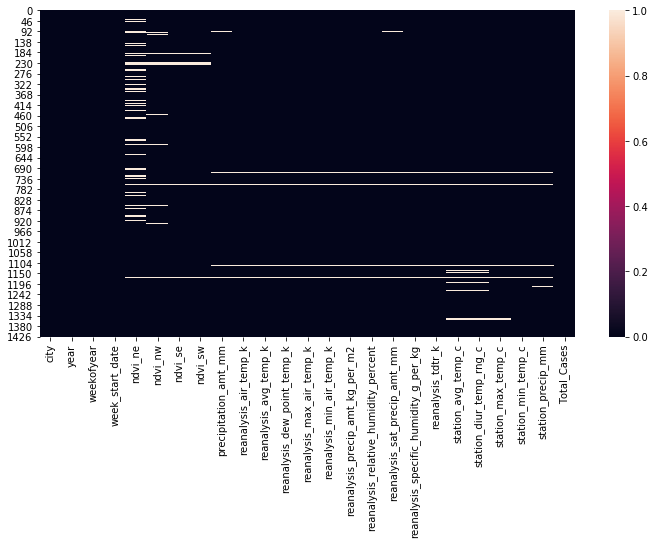

In [198]:
plt.rcParams['figure.figsize'] = (12,6)
sns.heatmap(VZ.isnull())

Text(0, 0.5, 'Frequency')

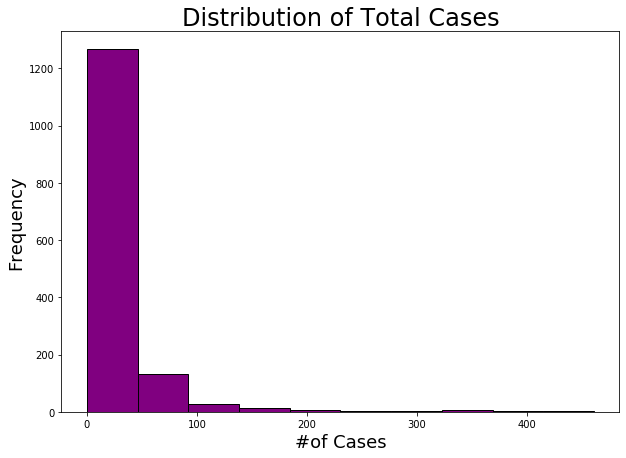

In [199]:
PP2.Total_Cases.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Total Cases', size=24)
plt.xlabel('#of Cases', size=18)
plt.ylabel('Frequency', size=18)


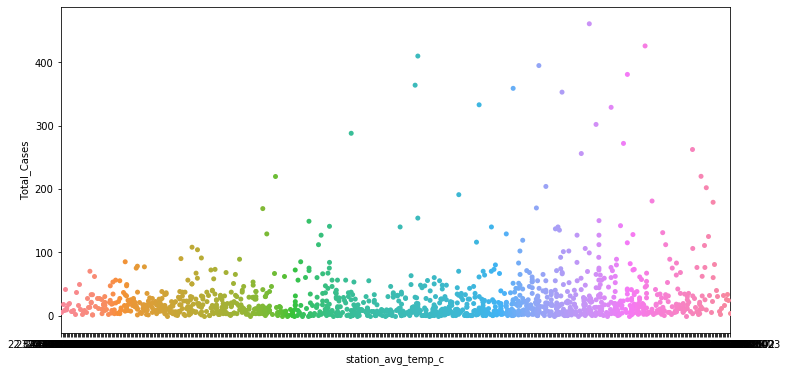

In [200]:
sns.stripplot(x='station_avg_temp_c', y = 'Total_Cases', data = VZ)

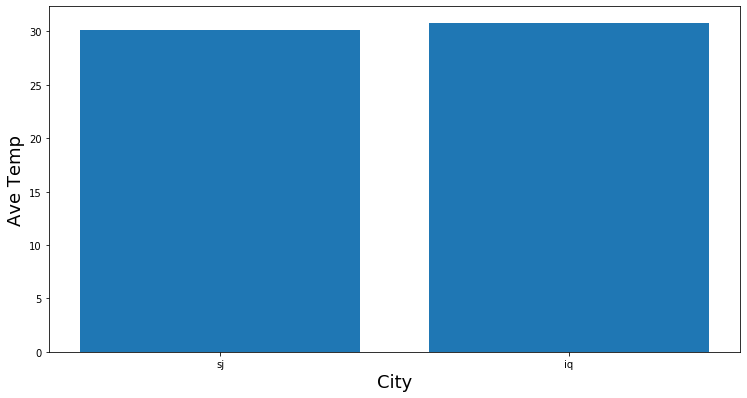

In [201]:
fig = plt.figure()
ax = fig.add_axes([0,0,.8,.8])
x = VZ['city']
y = VZ['station_avg_temp_c']
plt.xlabel('City', size=18)
plt.ylabel('Ave Temp', size=18)
ax.bar(x,y)
plt.show()

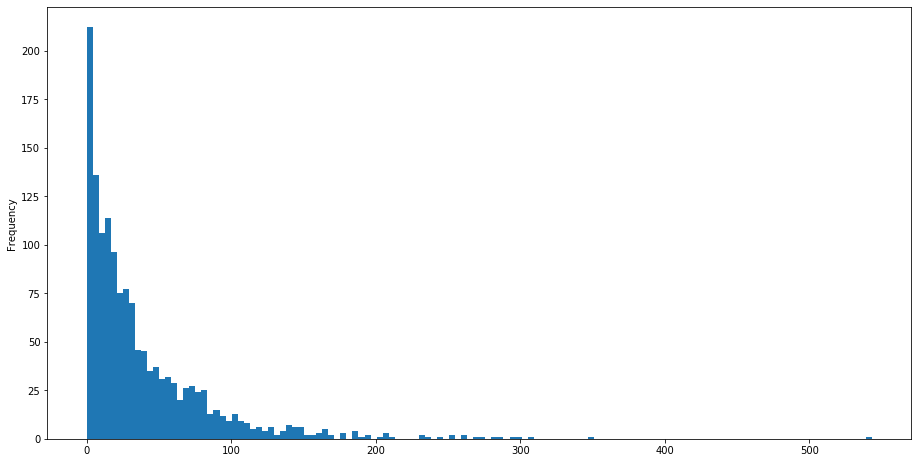

In [202]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
VZ['station_precip_mm'].plot.hist(bins=130)
plt.show()

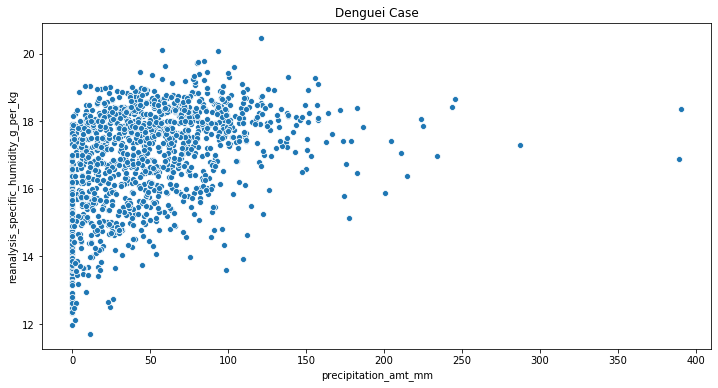

In [203]:
import matplotlib.pyplot as plt
#from scipy.stats import pearsonr
plt.title('Denguei Case')
sns.scatterplot(x="precipitation_amt_mm",y="reanalysis_specific_humidity_g_per_kg",data = VZ)

In [204]:
#sns.pairplot(PP, hue = 'Total_Cases', size = 2)
#plt.show()

In [205]:
#g = sns.FacetGrid(data = PP, col ='weekofyear', row = 'Total_Cases' )
#g.map(sns.distplot,'station_max_temp_c')

C:\Users\niahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


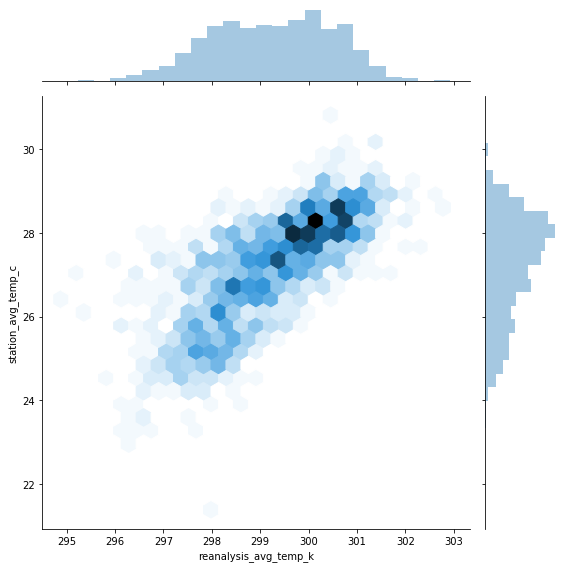

In [206]:

sns.jointplot( x = 'reanalysis_avg_temp_k', y = 'station_avg_temp_c',
              data = VZ, kind = 'hex', size = 8)

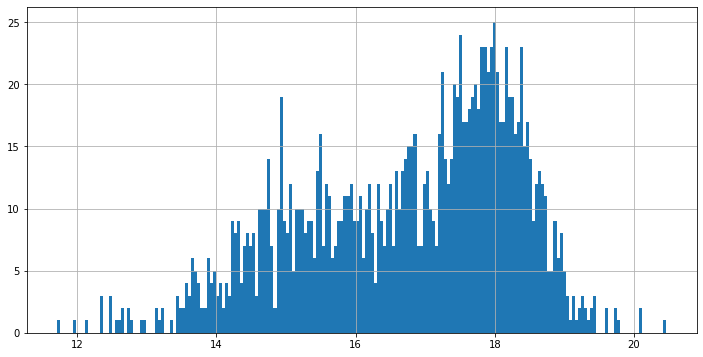

In [207]:
VZ['reanalysis_specific_humidity_g_per_kg'].hist(bins = 200)

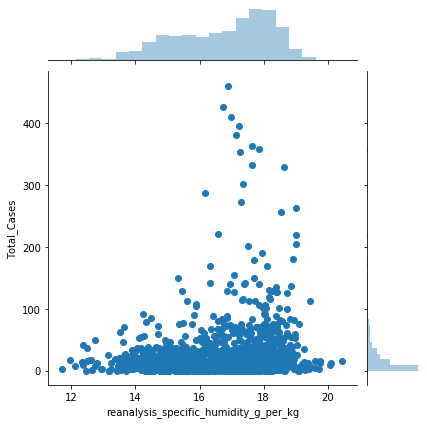

In [208]:
sns.jointplot(x = 'reanalysis_specific_humidity_g_per_kg', y = 'Total_Cases', data = VZ)

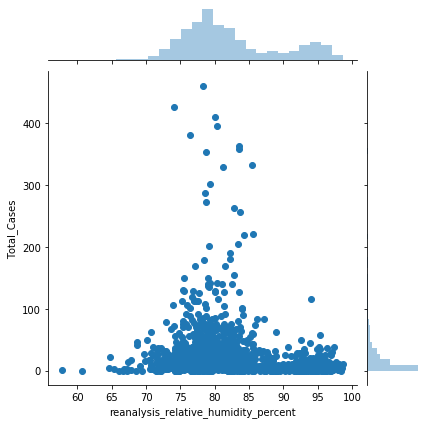

In [209]:
sns.jointplot(x = 'reanalysis_relative_humidity_percent', y = 'Total_Cases', data = VZ)

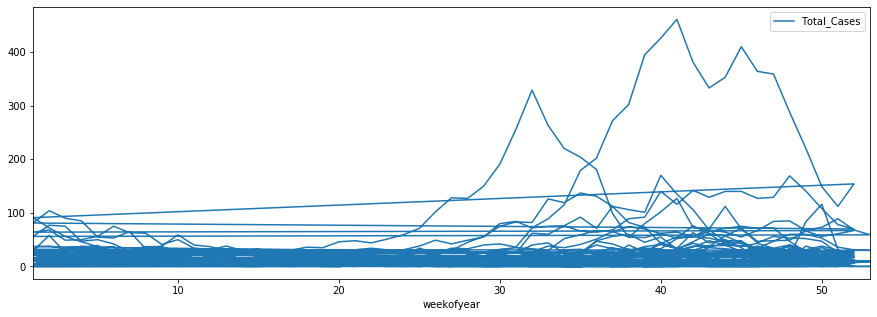

In [210]:
VZ.plot.line(x = 'weekofyear', y = 'Total_Cases', figsize = (15,5) )

C:\Users\niahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\niahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\niahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


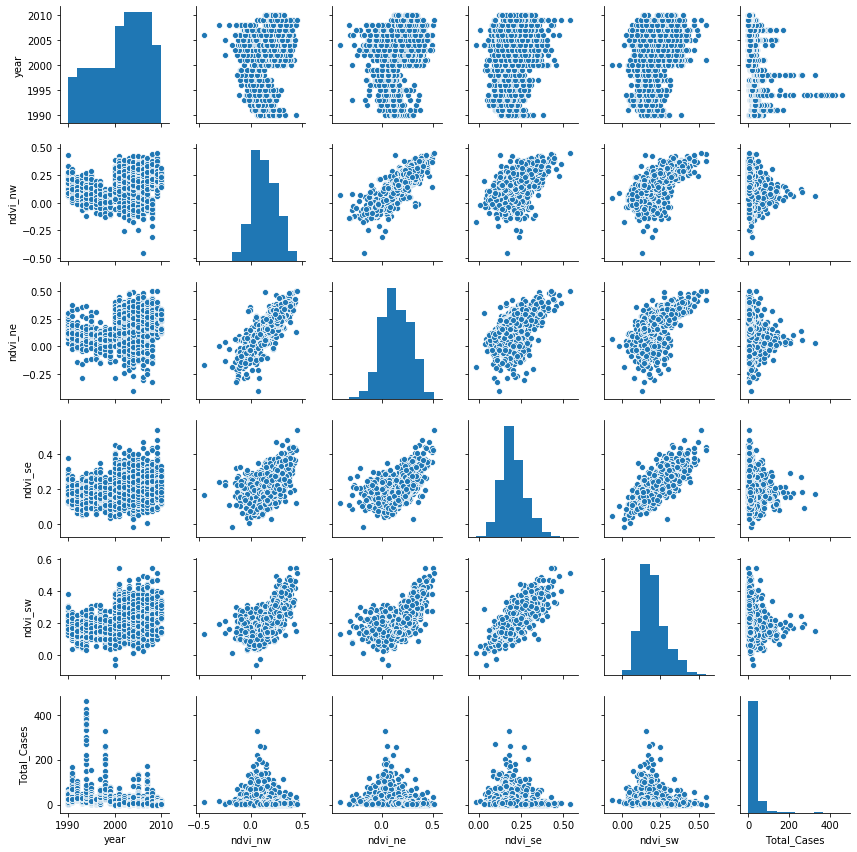

In [211]:
sns.pairplot(PP,  size = 2)
plt.show()

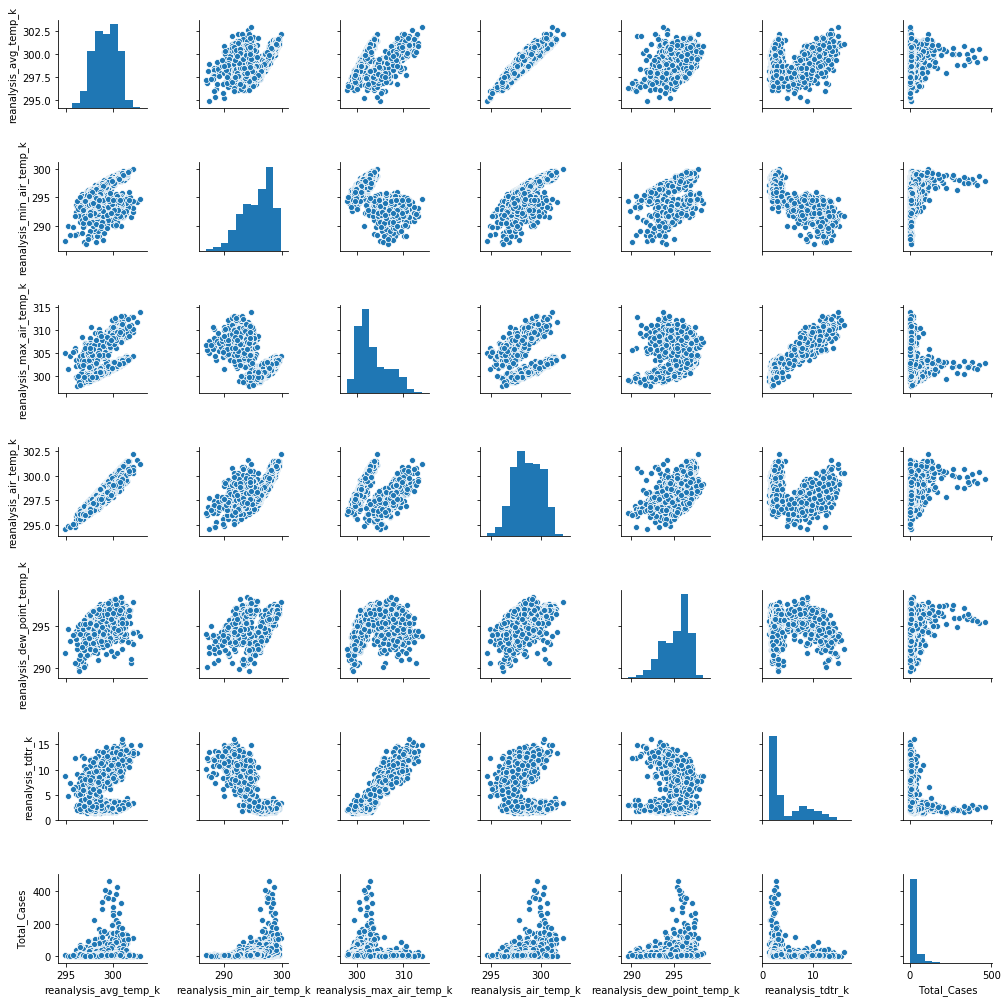

In [212]:
sns.pairplot(PP1,  size = 2)
plt.show()

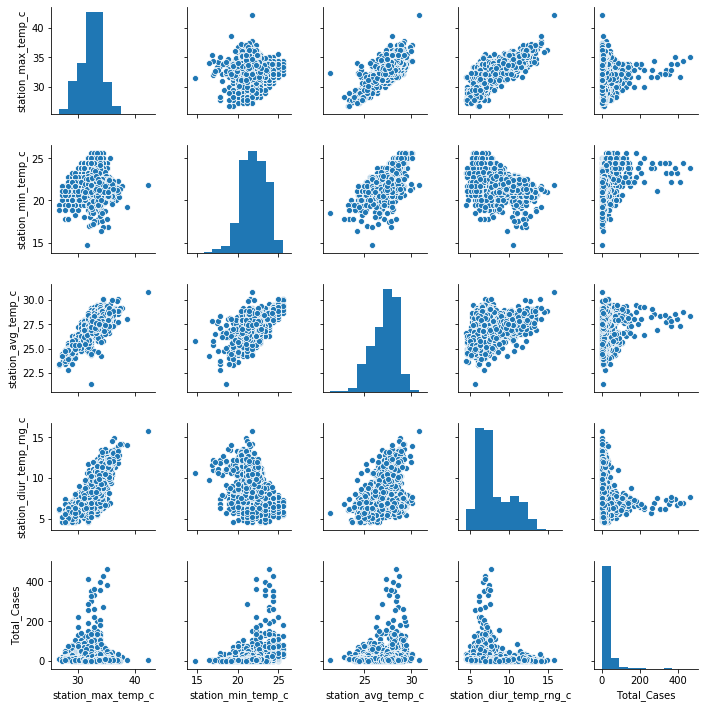

In [213]:
sns.pairplot(PP2,  size = 2)
plt.show()

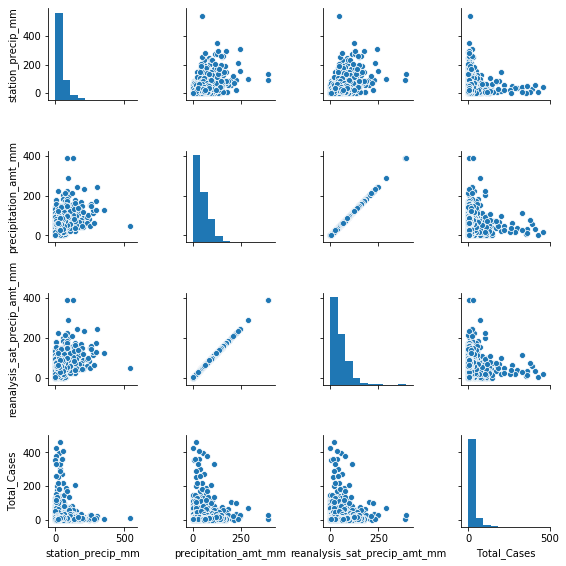

In [214]:
sns.pairplot(PP3,  size = 2)
plt.show()

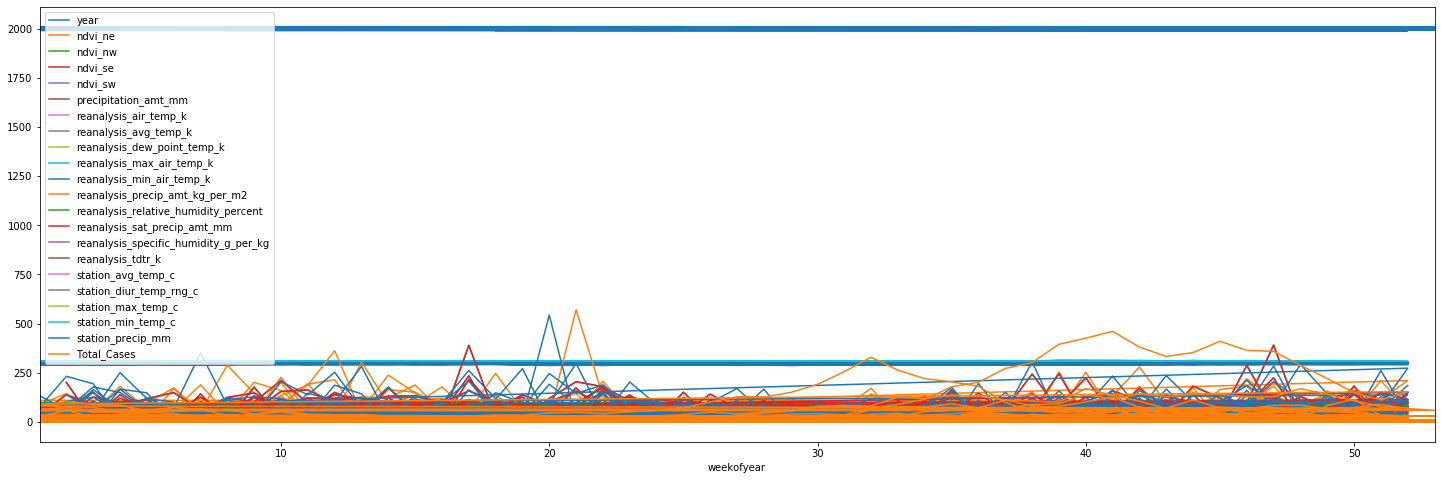

In [215]:
VZ.plot.line(x = 'weekofyear', figsize = (25,8))

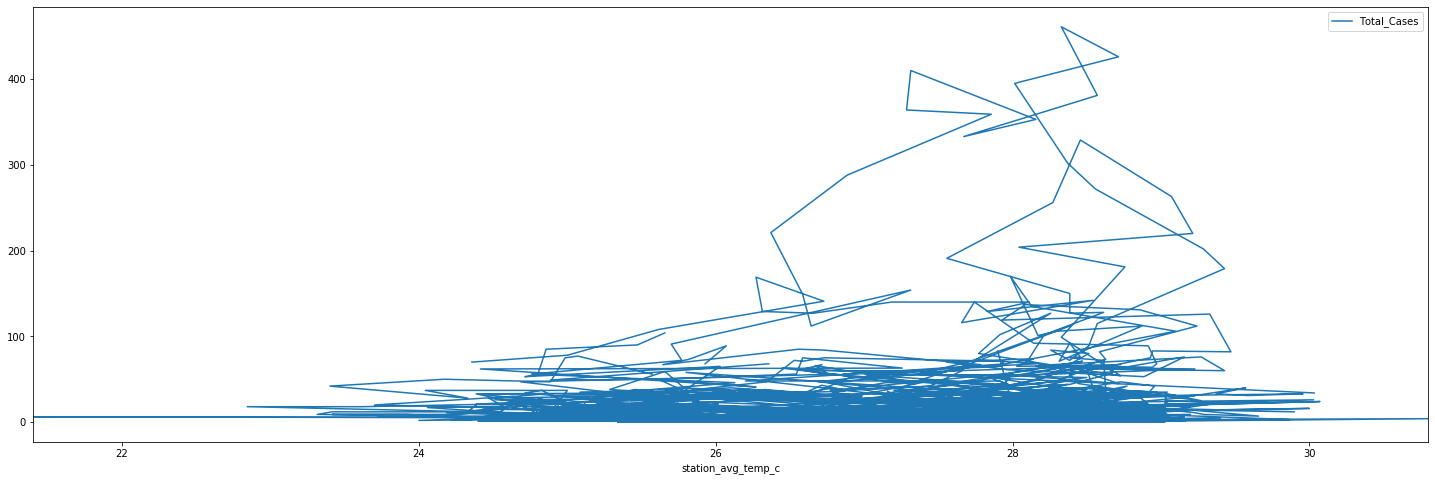

In [216]:
PP2.plot.line( x = 'station_avg_temp_c', y = 'Total_Cases',figsize = (25,8))

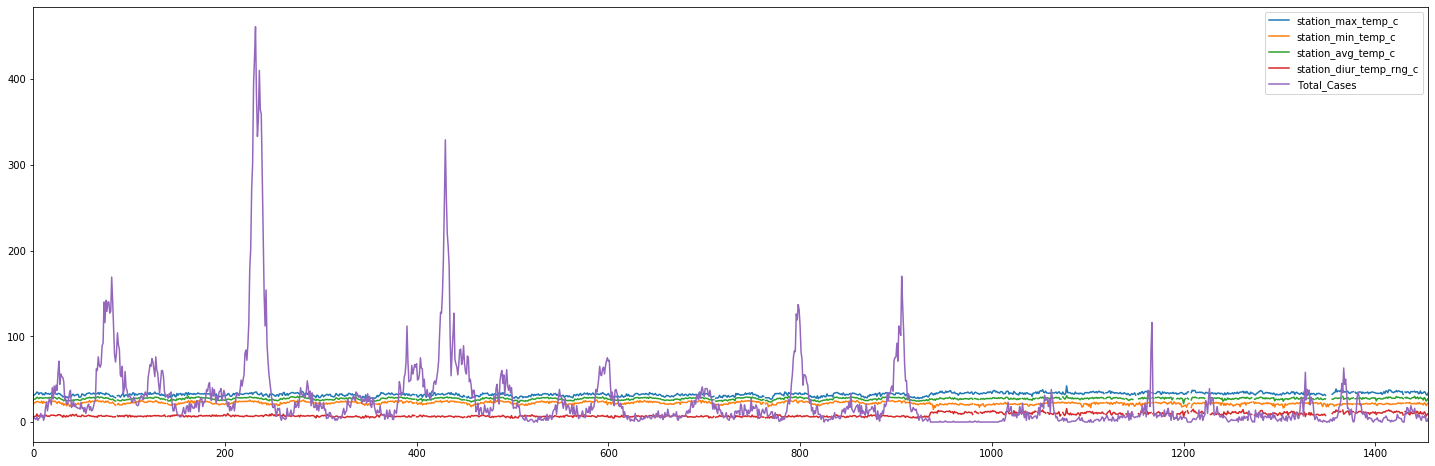

In [217]:
PP2.plot.line(figsize = (25,8))

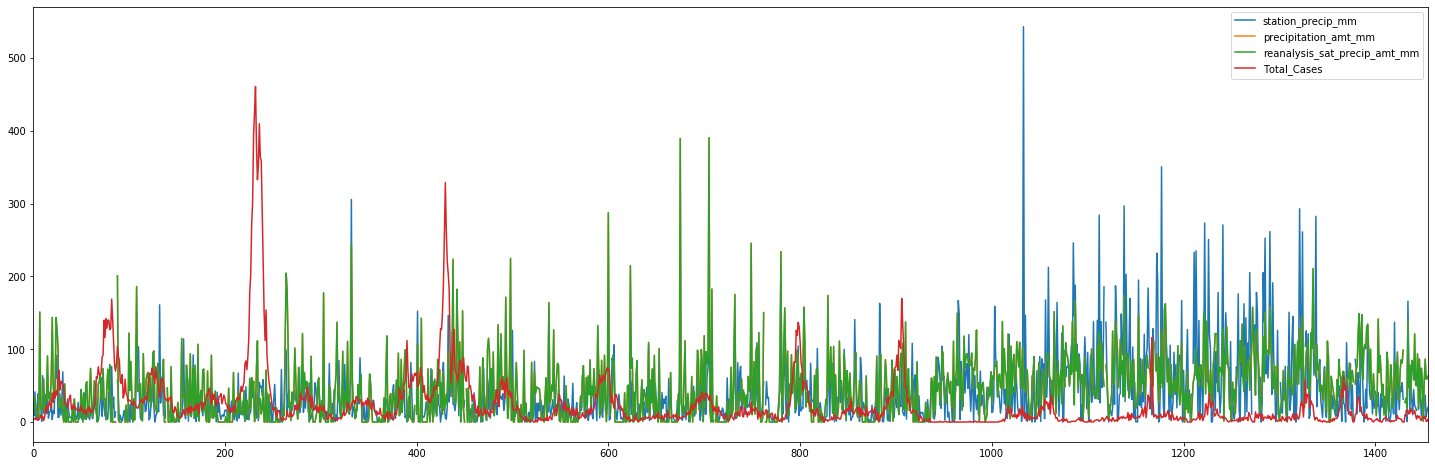

In [218]:
PP3.plot.line(figsize = (25,8))

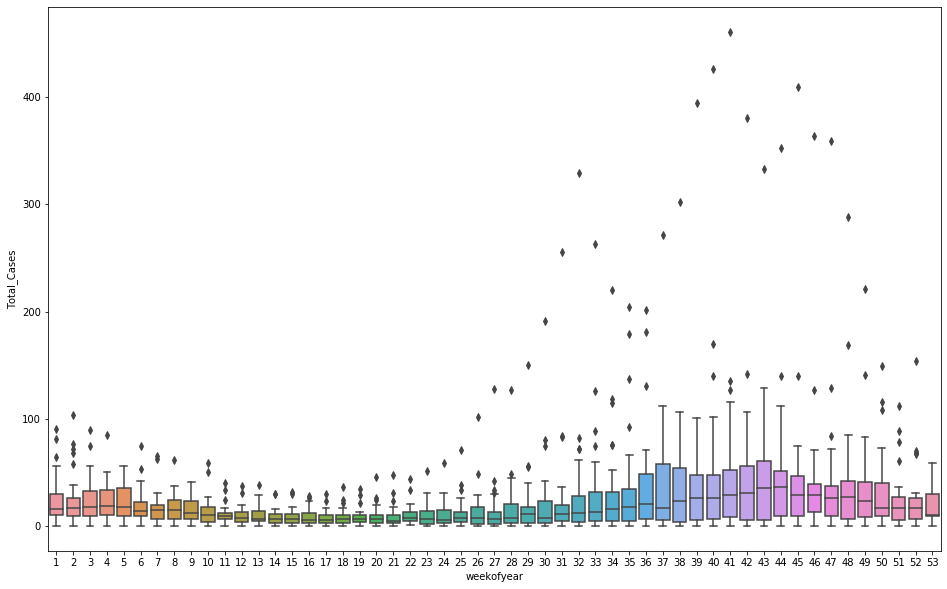

In [219]:
plt.rcParams['figure.figsize'] = (16,10)
sns.boxplot(x= 'weekofyear', y = 'Total_Cases', data = VZ)

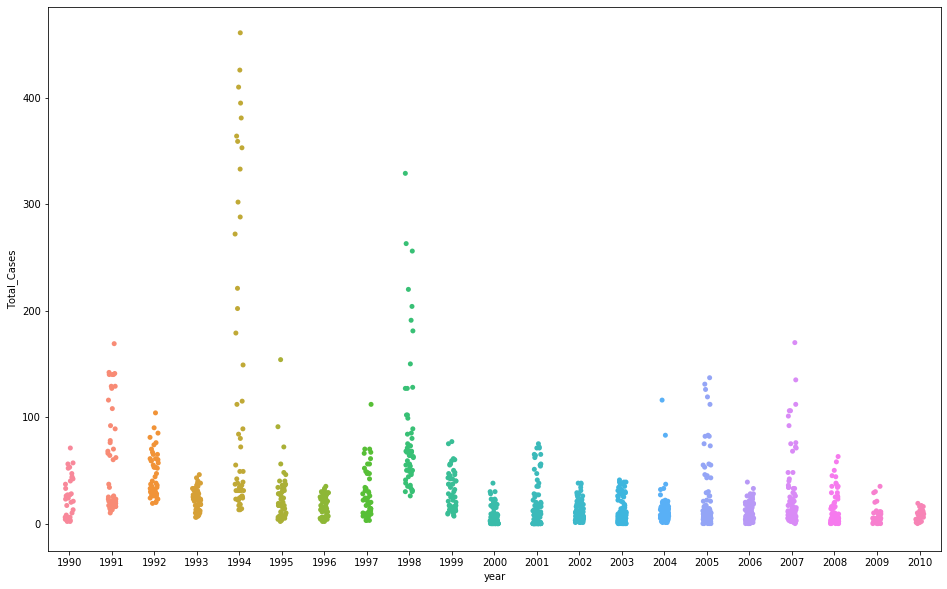

In [220]:
sns.stripplot(x='year', y = 'Total_Cases', data = VZ)

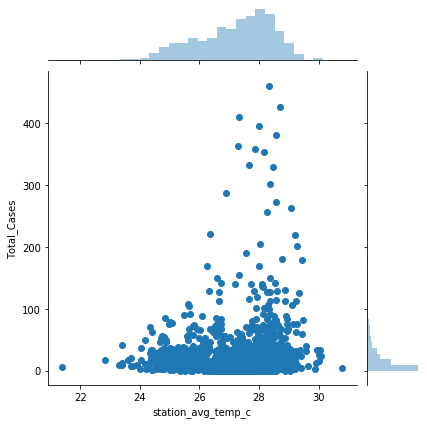

In [221]:
sns.jointplot(x = 'station_avg_temp_c', y = 'Total_Cases', data = VZ)

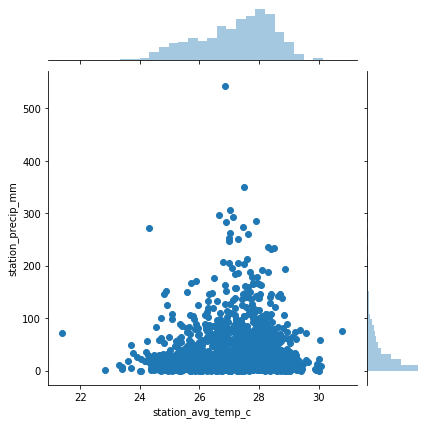

In [222]:
sns.jointplot(x = 'station_avg_temp_c', y = 'station_precip_mm', data = VZ)

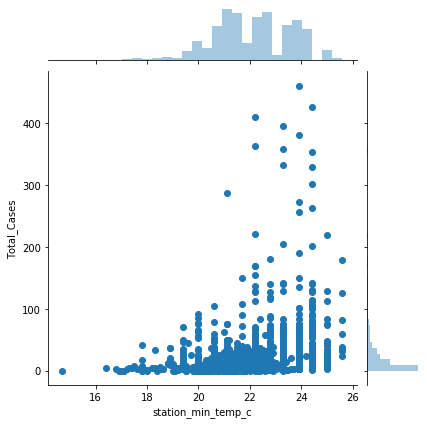

In [223]:
sns.jointplot(x = 'station_min_temp_c', y = 'Total_Cases', data = VZ)

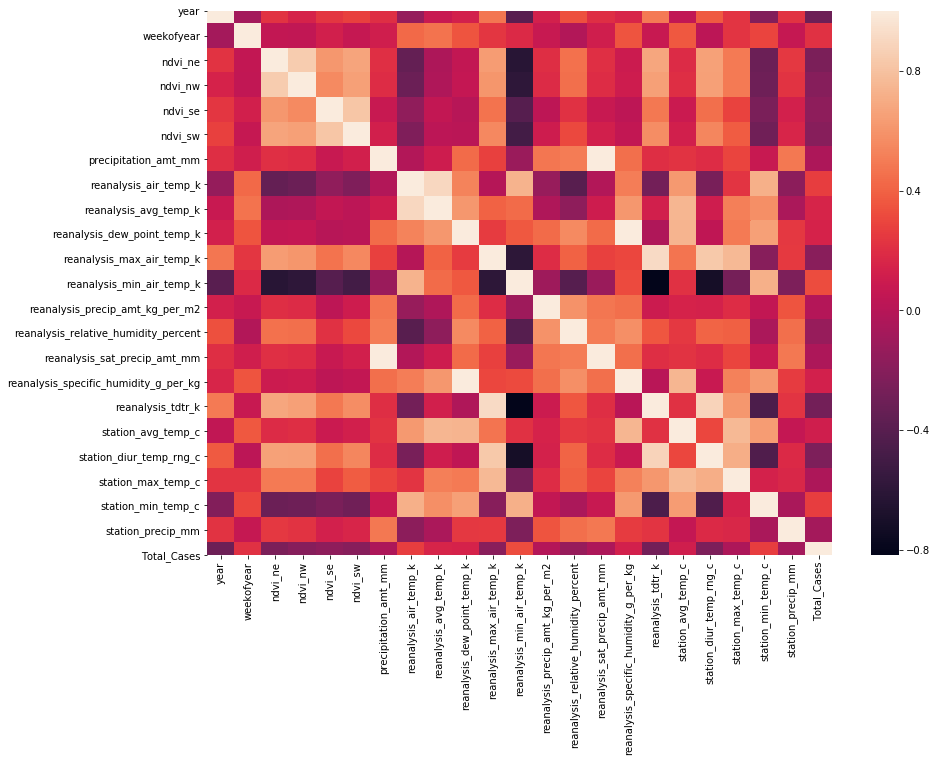

In [224]:
plt.rcParams['figure.figsize'] = (14,10)
sns.heatmap(VZ.corr())

In [225]:
#sns.jointplot(x = VZ[VZ['year'] == 1994], y = 'Total_Cases', data = VZ)

In [226]:
YR= VZ[VZ['year']== 1994]

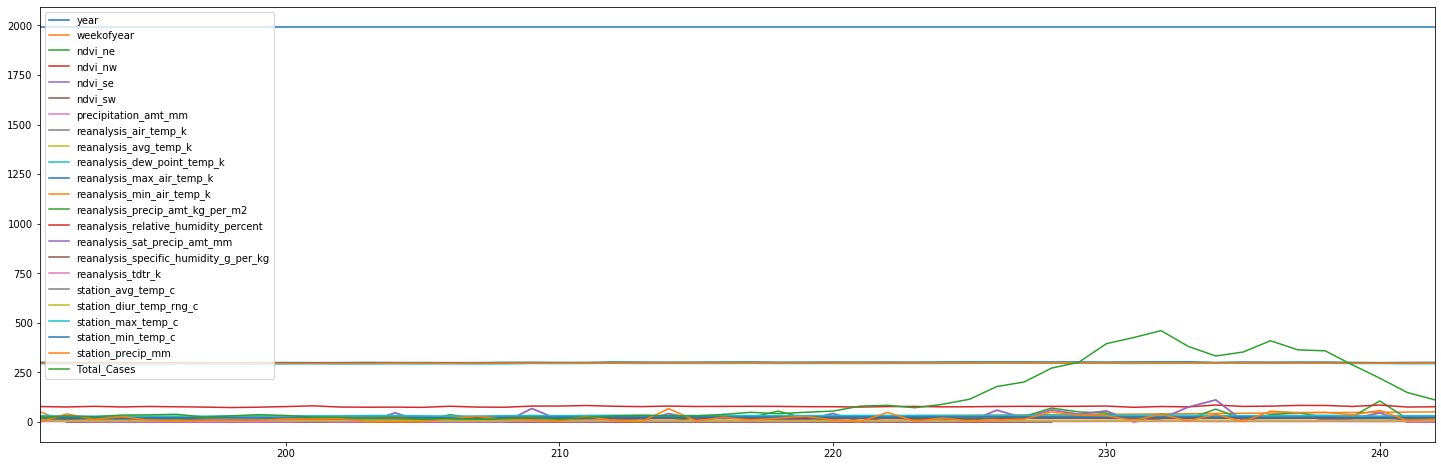

In [227]:
YR.plot.line(figsize = (25,8))

In [228]:
hm = VZ.pivot_table(index = 'weekofyear', columns = ['station_avg_temp_c'], values = 'Total_Cases')

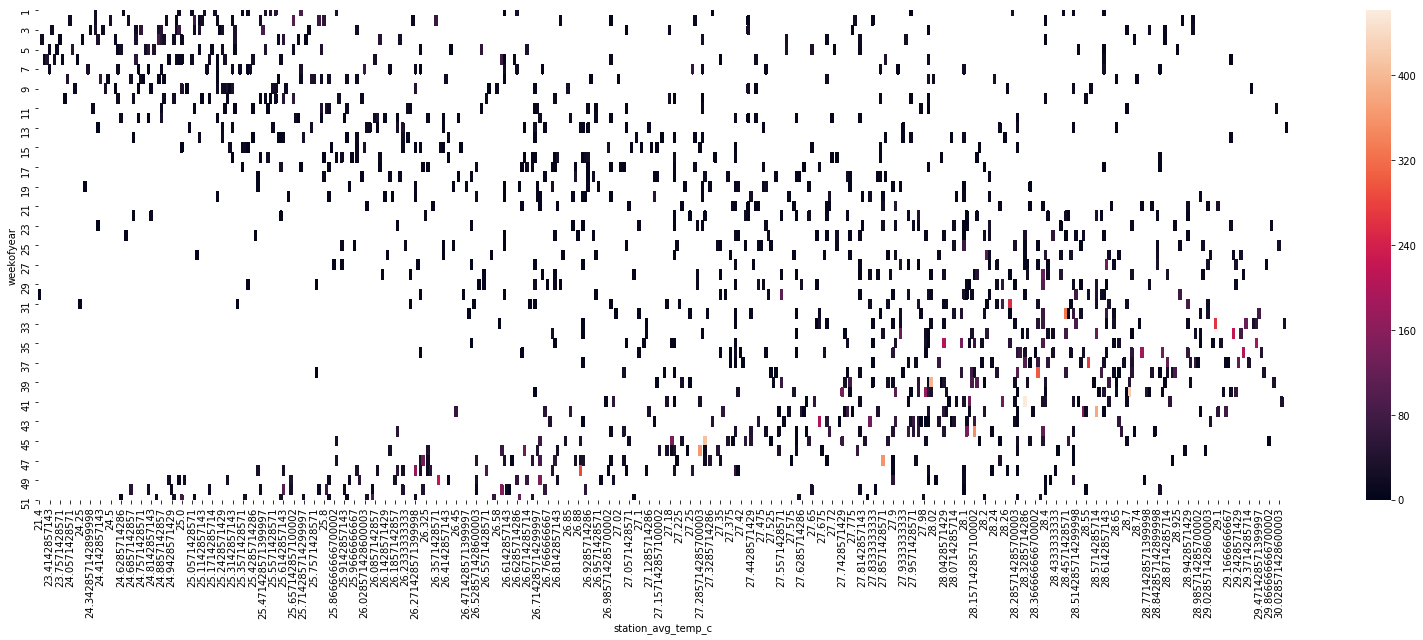

In [229]:
plt.rcParams['figure.figsize'] = (28,9)
sns.heatmap(hm)

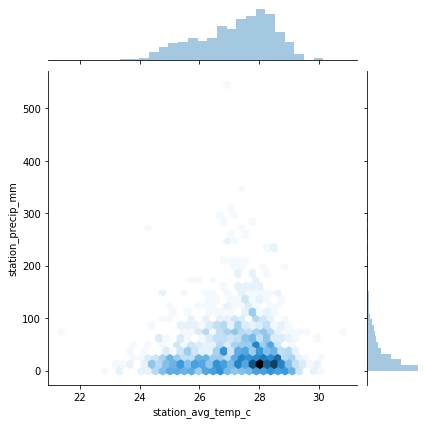

In [230]:
sns.jointplot(x = 'station_avg_temp_c', y = 'station_precip_mm', data = VZ, kind = 'hex')

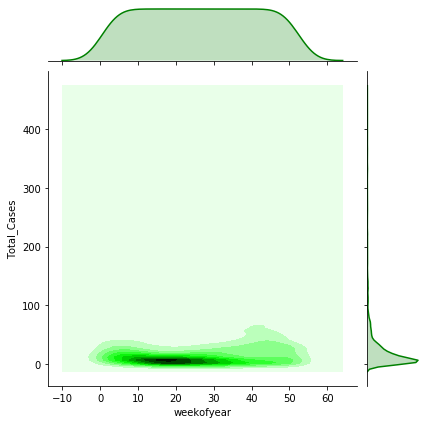

In [231]:
sns.jointplot(x = 'weekofyear', y = 'Total_Cases', data = VZ, color = 'green', kind = 'kde')

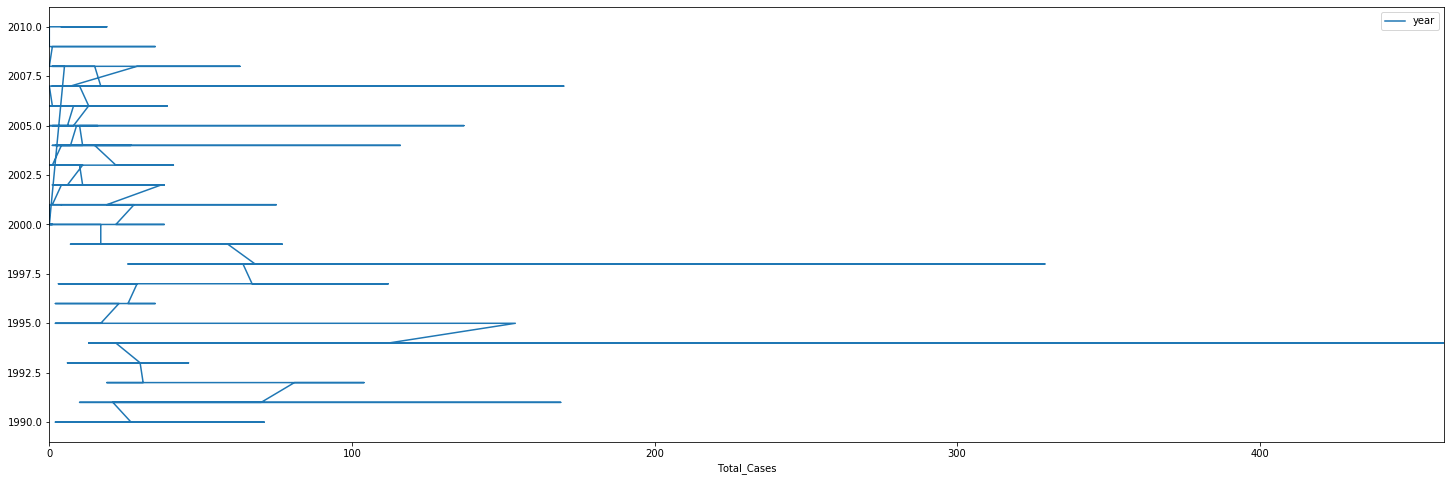

In [232]:
VZ.plot.line(x = 'Total_Cases', y = 'year', figsize = (25,8))

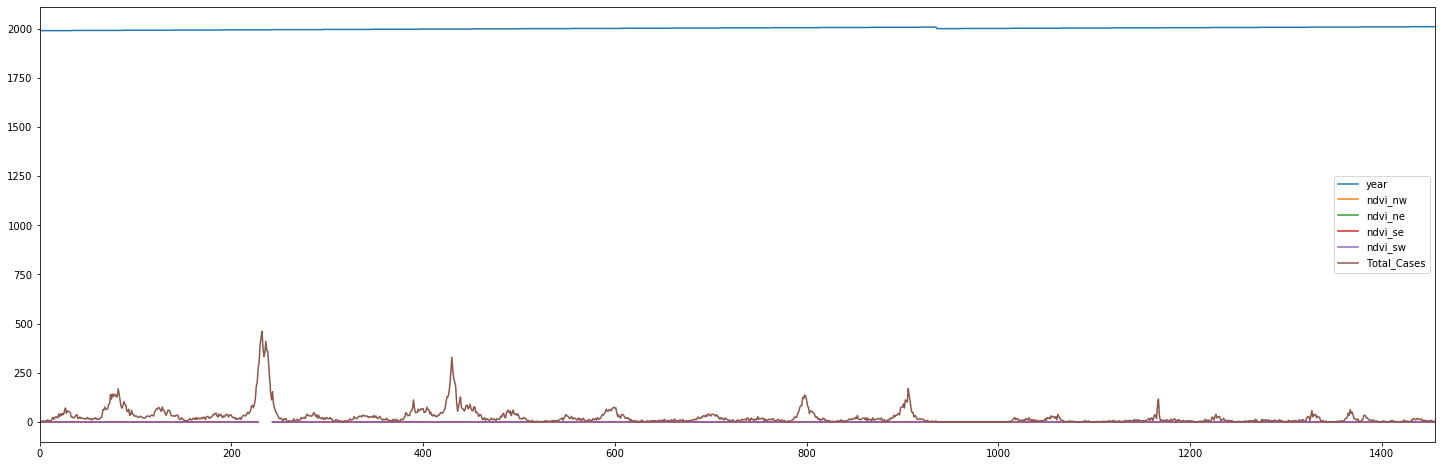

In [233]:
PP.plot.line( figsize = (25,8))

In [234]:
PP.set_index('year')

,ndvi_nw,ndvi_ne,ndvi_se,ndvi_sw,Total_Cases
year,,,,,
1990,0.103725,0.122600,0.198483,0.177617,4
1990,0.142175,0.169900,0.162357,0.155486,5
1990,0.172967,0.032250,0.157200,0.170843,4
1990,0.245067,0.128633,0.227557,0.235886,3
1990,0.262200,0.196200,0.251200,0.247340,6
...,...,...,...,...,...
2010,0.318900,0.342750,0.256343,0.292514,5
2010,0.160371,0.160157,0.136043,0.225657,8
2010,0.146057,0.247057,0.250357,0.233714,1


Text(0.5, 0, 'Time by week')

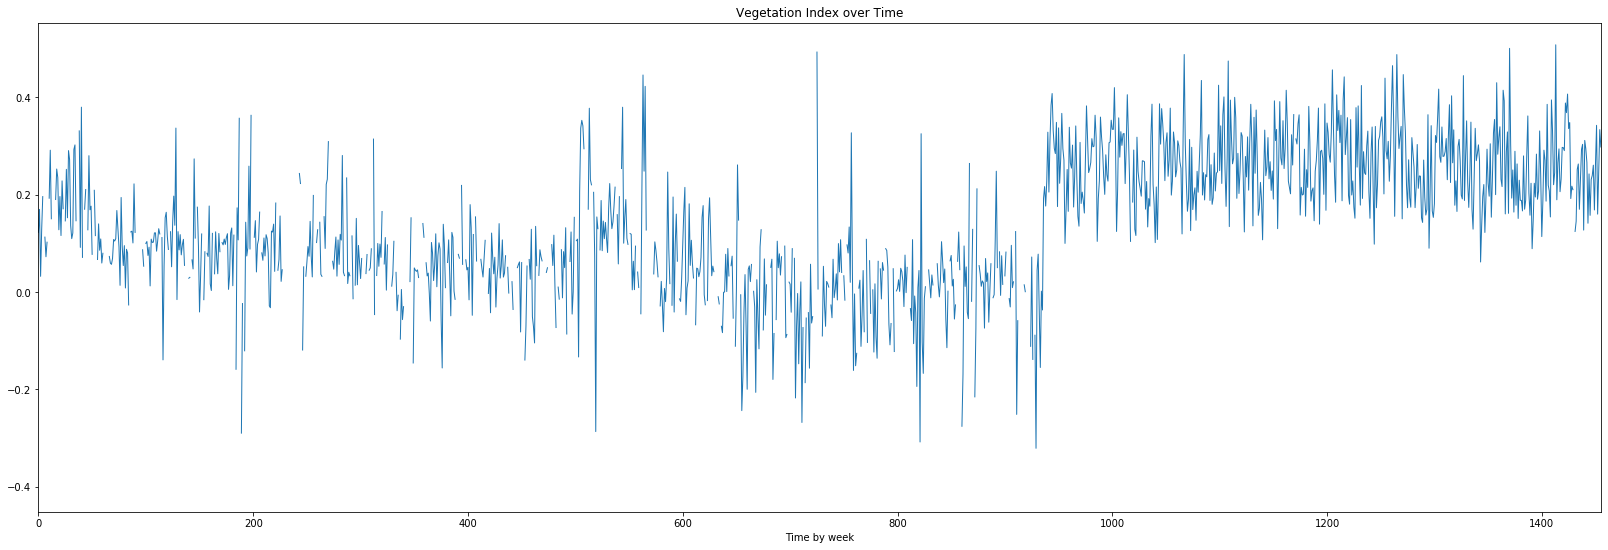

In [235]:
(VZ
     .ndvi_ne
     .plot
     .line(lw=1))

plt.title('Vegetation Index over Time')
plt.xlabel('Time by week')

In [236]:
hmdty = VZ[['Total_Cases','reanalysis_specific_humidity_g_per_kg']]
hmdty

,Total_Cases,reanalysis_specific_humidity_g_per_kg
0,4,14.012857
1,5,15.372857
2,4,16.848571
3,3,16.672857
4,6,17.210000
...,...,...
1451,5,18.485714
1452,8,18.070000
1453,1,17.008571
1454,1,16.815714


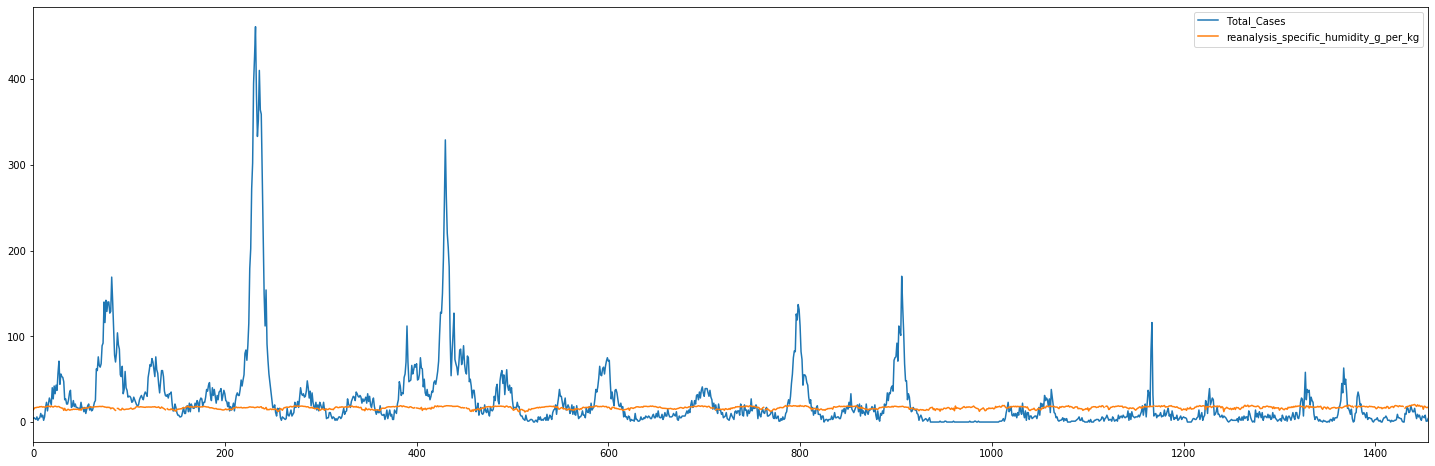

In [237]:
hmdty.plot.line(figsize = (25,8))

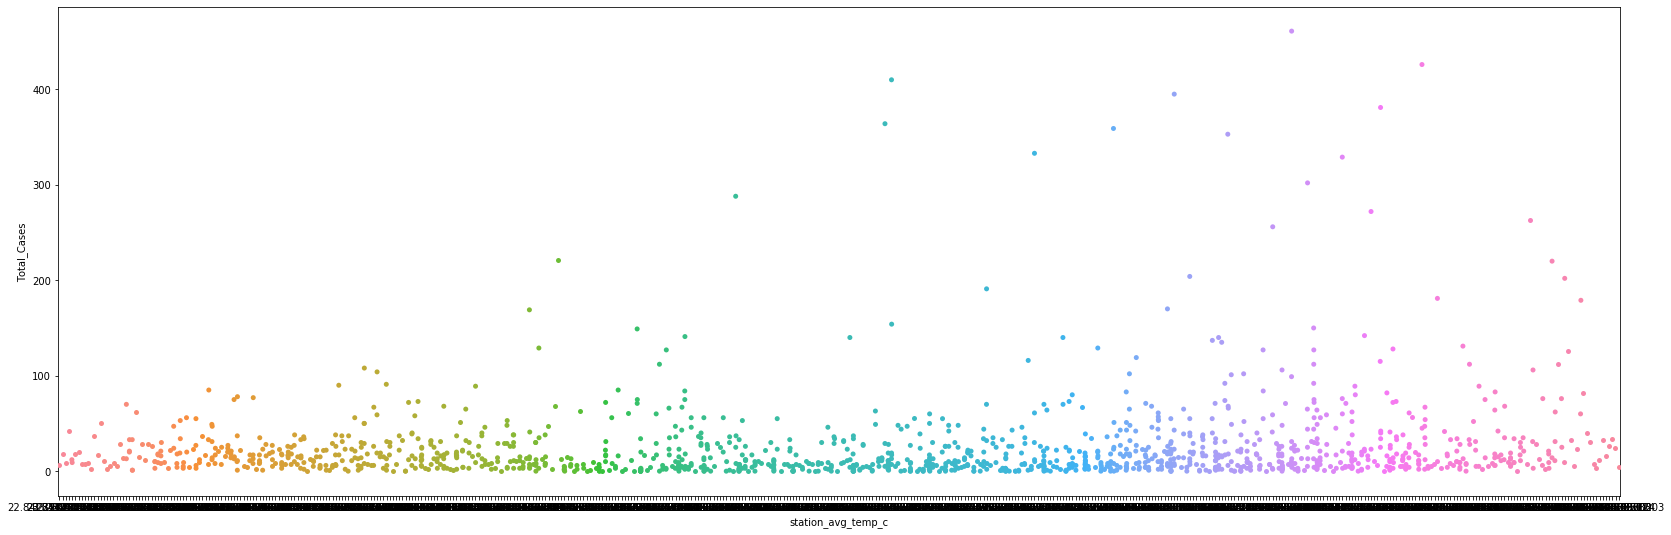

In [238]:
sns.stripplot(x='station_avg_temp_c', y = 'Total_Cases', data = VZ)